# Linear Algebra in Python

In [13]:
# CREATE A ROW VECTOR AND A COLUMN VECTOR
import numpy as np
vector_row = np.array([[1, -5, 3, 2, 4]])
vector_column = np.array([[1], 
                          [2], 
                          [3], 
                          [4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 5)
(4, 1)


In [14]:
# TRANSPOSE THE ROW VECTOR AND CALCULATE L1, L2, AND LINF NORMS.
from numpy.linalg import norm
new_vector = vector_row.T
print(new_vector)
norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)
print('L_1 is: %.1f'%norm_1)
print('L_2 is: %.1f'%norm_2)
print('L_inf is: %.1f'%norm_inf)

[[ 1]
 [-5]
 [ 3]
 [ 2]
 [ 4]]
L_1 is: 15.0
L_2 is: 7.4
L_inf is: 5.0


In [15]:
# COMPUTE ANGLE BETWEEN VECTORS v AND w
from numpy import arccos, dot

v = np.array([[10, 9, 3]])
w = np.array([[2, 5, 12]])
theta = \
    arccos(dot(v, w.T)/(norm(v)*norm(w)))
print(theta)

[[0.97992471]]


In [16]:
# FIND CROSS PRODUCT OF v AND w
v = np.array([[0, 2, 0]])
w = np.array([[3, 0, 0]])
print(np.cross(v, w))

[[ 0  0 -6]]


In [17]:
# USE LINEAR COMBINATIONS TO GET x VECTOR
v = np.array([[0, 3, 2]])
w = np.array([[4, 1, 1]])
u = np.array([[0, -2, 0]])
x = 3*v-2*w+4*u
print(x)

[[-8 -1  4]]


In [18]:
# IMPORTANCE OF DIMENSIONS IN MATRIX MULTIPLICATION
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(Q)
print(np.dot(P, Q))
np.dot(Q, P)

[[1 7]
 [2 3]
 [5 0]]
[[2 6 3 1]
 [1 2 3 4]]
[[ 9 20 24 29]
 [ 7 18 15 14]
 [10 30 15  5]]


ValueError: shapes (2,4) and (3,2) not aligned: 4 (dim 1) != 3 (dim 0)

In [19]:
# FIND DETERMINANT OF A MATRIX
from numpy.linalg import det

M = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])
print('M:\n', M)

print('Determinant: %.1f'%det(M))
# CREATE 4X4 IDENTITY MATRIX AND SHOW ITS PRODUCT WITH MATRIX M
I = np.eye(4)
print('I:\n', I)
print('M*I:\n', np.dot(M, I))

M:
 [[0 2 1 3]
 [3 2 8 1]
 [1 0 0 3]
 [0 3 2 1]]
Determinant: -38.0
I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
M*I:
 [[0. 2. 1. 3.]
 [3. 2. 8. 1.]
 [1. 0. 0. 3.]
 [0. 3. 2. 1.]]


In [20]:
# FIND INVERSE OF A MATRIX
from numpy.linalg import inv

print('Inv M:\n', inv(M))
# SHOW MATRIX WITH NO INVERSE (SINCE DETERMINANT = 0)
P = np.array([[0,1,0],
              [0,0,0],
              [1,0,1]])
print('det(p):\n', det(P))

Inv M:
 [[-1.57894737 -0.07894737  1.23684211  1.10526316]
 [-0.63157895 -0.13157895  0.39473684  0.84210526]
 [ 0.68421053  0.18421053 -0.55263158 -0.57894737]
 [ 0.52631579  0.02631579 -0.07894737 -0.36842105]]
det(p):
 0.0


In [21]:
#CONDITION AND RANK, AUGMENTED MATRIX
from numpy.linalg import \
             cond, matrix_rank

A = np.array([[1,1,0],
              [0,1,0],
              [1,0,1]])

print('Condition number:\n', cond(A))
print('Rank:\n', matrix_rank(A))
y = np.array([[1], [2], [1]])
A_y = np.concatenate((A, y), axis = 1)
print('Augmented matrix:\n', A_y)

Condition number:
 4.048917339522305
Rank:
 3
Augmented matrix:
 [[1 1 0 1]
 [0 1 0 2]
 [1 0 1 1]]


In [22]:
# LU DECOMPOSITION METHOD
import numpy as np

u = np.array([[4, 3, -5], 
              [0, -2.5, 2.5], 
              [0, 0, 12]])
l = np.array([[1, 0, 0], 
              [-0.5, 1, 0], 
              [2, -0.8, 1]])

print('LU=', np.dot(l, u))

LU= [[ 4.  3. -5.]
 [-2. -4.  5.]
 [ 8.  8.  0.]]


In [23]:
a = [[8, 3, -3], [-2, -8, 5], [3, 5, 10]]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag 

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

matrix is diagonally dominant


In [24]:
# GAUSS-SEIDEL METHOD
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
    x1 = (14-3*x2+3*x3)/8
    x2 = (5+2*x1-5*x3)/(-8)
    x3 = (-8-3*x1-5*x2)/(-5)
    x = np.array([x1, x2, x3])
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, 1.5875
2, 2.7437, -0.3188, 2.9275
3, 2.9673, 0.4629, 3.8433
4, 3.0177, 1.0226, 4.4332
5, 3.0290, 1.3885, 4.8059
6, 3.0315, 1.6208, 5.0397
7, 3.0321, 1.7668, 5.1861
8, 3.0322, 1.8582, 5.2776
9, 3.0322, 1.9154, 5.3348
10, 3.0323, 1.9512, 5.3705
11, 3.0323, 1.9735, 5.3929
12, 3.0323, 1.9875, 5.4068
13, 3.0323, 1.9962, 5.4156
14, 3.0323, 2.0017, 5.4210
Converged!


# PCA (Principal Component Analysis) in Python

### Examine Breast Cancer Data Set

In [25]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [26]:
# Bring in labels also
breast_labels = breast.target
breast_labels.shape

(569,)

In [27]:
# Reshape label matrix to be one column
import numpy as np
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [28]:
# Create a dataframe and view features
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [29]:
# Add 'Label' as a column heading for the labels row we concatenated (it's missing from the features array)
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [30]:
# Use words for benign and malignant rather than 0 or 1
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


### Examine CIFAR data

In [31]:
from keras.datasets import cifar10

# Returns training and test data, along with their labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [32]:
# Shape of the data
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [33]:
# Shape of the labels
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [34]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [35]:
import matplotlib.pyplot as plt

# Tells jupyter notebook to display the output within the notebook itself
%matplotlib inline

In [36]:
# Create dictionary for label names
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


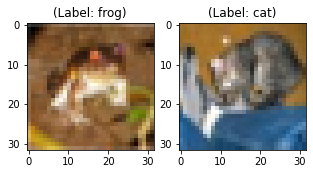

In [37]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

## Visualizing the Breast Cancer Data

In [38]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(569, 30)

In [39]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [40]:
feat_cols = ['feature '+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 20,feature 21,feature 22,feature 23,feature 24,feature 25,feature 26,feature 27,feature 28,feature 29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [42]:
# projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [43]:
# create a DataFrame that will have the principal component values for all 569 samples.
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [44]:
# Based on this info, 44.3% of the data is contained in principal component 1, 19% is in principal component 2, and the
# remaining 36.7% of the data is lost in the process of projection
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

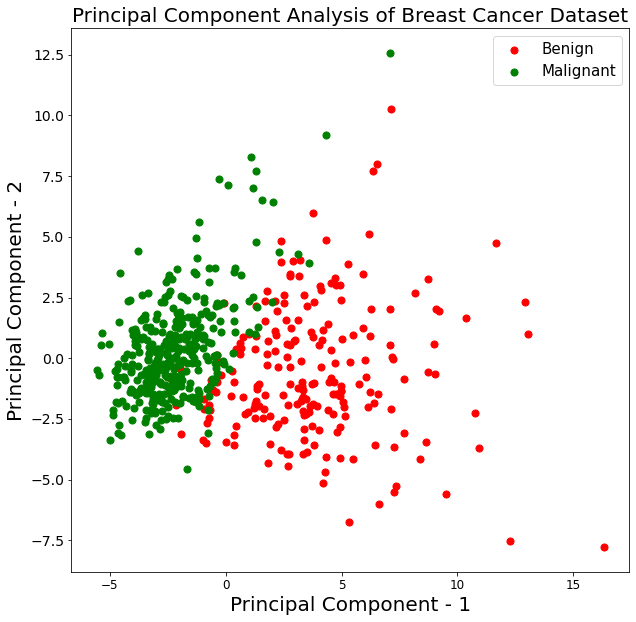

In [45]:
# Create the scatterplot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## Visualizing the CIFAR-10 Data

In [46]:
# check min and max values for data set
np.min(x_train),np.max(x_train)

(0, 255)

In [47]:
#Since the max value is 255, we can normalize the data by dividing by 255
x_train = x_train/255.0
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [48]:
x_train.shape

(50000, 32, 32, 3)

In [49]:
# Reshape image dimenstions from three to one (flatten the images) -- WHY IS (-1,3072) USED ON THE NEXT LINE?!?!?  HOW ARE
# THESE NUMBERS DETERMINED?
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [50]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [51]:
# create the PCA method and pass the number of components as two and apply fit_transform on the training data
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1]) # PCA will be applied on all the columns except 
                                                                          # the last one, which is the label for each image.

In [52]:
# Convert two principal components from a numpy array into a pandas dataframe
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [53]:
# Find info variance of the principal components
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


In [54]:
# So 29% of the data is contained in PC1 and 11% is in PC2.

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

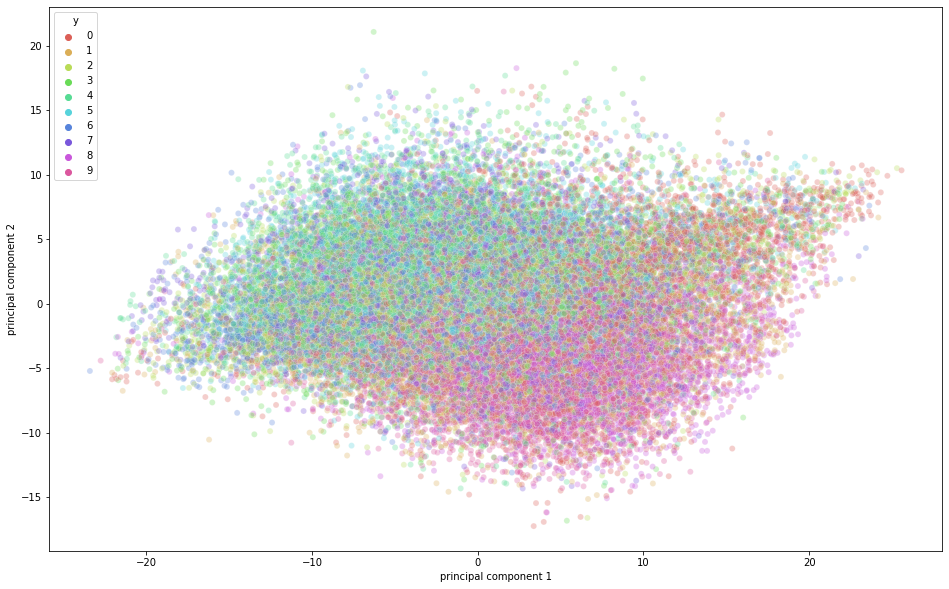

In [55]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [56]:
# Normalize the testing images
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)

In [57]:
# Reshape (flatten) the test data
x_test_flat = x_test.reshape(-1,3072)

In [58]:
# You can pass how much variance you want PCA to capture. Let's pass 0.9 as a parameter to the PCA model, which means that
# PCA will hold 90% of the variance and the number of components required to capture 90% variance will be used.
pca = PCA(0.9)

In [59]:
# fit the PCA instance on the training images
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [60]:
# how many n_components PCA used to capture 0.9 variance.
pca.n_components_

99

In [61]:
# to achieve 90% variance, the dimension was reduced to 99 principal components from the actual 3072 dimensions

In [62]:
# apply transform on both the training and test set to generate a transformed dataset from the parameters generated 
# from the fit method
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [67]:
#import libraries needed for deep learning model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import rmsprop_v2 as RMSprop

In [68]:
# convert training and testing labels to one-hot encoding vector.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [69]:
#define the number of epochs, number of classes, and the batch size for the model
batch_size = 128
num_classes = 10
epochs = 20

In [70]:
# define sequential model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              102400    
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [74]:
# compile and train the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

TypeError: 'module' object is not callable

# LaTeX Formatting

In [83]:
from pylatex import Document, Section, Subsection, Tabular
from pylatex import Math, TikZ, Axis, Plot, Figure, Matrix, Alignat
from pylatex.utils import italic
import os

In [ ]:
# Definite integral with limits above and below the integral symbol
\[ \int\limits_0^1 x^2 + y^2 \ dx \]

In [77]:
# Definite integral with limits next to the integral symbol
\[ \int_0^1 x^2 + y^2 \ dx \]

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_14432/308951212.py, line 2)

In [114]:
# Subscripts and superscripts 
\[ a_1^2 + a_2^2 = a_3^2 \]

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_13164/1124417328.py, line 1)

In [115]:
# Longer subscripts and superscripts need to be enclosed in curly brackets
\[ x^{2 \alpha} - 1 = y_{ij} + y_{ij}  \]

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_13164/2617678132.py, line 1)

In [116]:
# Nested superscripts
\[ (a^n)^{r+s} = a^{nr+ns}  \]

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_13164/3654683313.py, line 1)

In [79]:
# See below
\[ \sum_{i=1}^{\infty} \frac{1}{n^s} = \prod_p \frac{1}{1 - p^{-s}} \]

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_14432/3876931342.py, line 2)

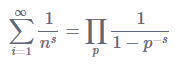

In [ ]:
Here are some examples of simple usage of subscripts and superscripts:

\[ \int\limits_0^1 x^2 + y^2 \ dx \]

\vspace{1cm}

Using superscript and subscripts in the same expression

\[ a_1^2 + a_2^2 = a_3^2 \]

\vspace{1cm}

Longer subscripts and superscripts:

\[ x^{2 \alpha} - 1 = y_{ij} + y_{ij}  \]

\vspace{1cm}

Nested subscripts and superscripts

\[ (a^n)^{r+s} = a^{nr+ns} \]

\vspace{1cm}

Example of a mathematical equation with subscripts and superscripts

\[ \sum_{i=1}^{\infty} \frac{1}{n^s} = \prod_p \frac{1}{1 - p^{-s}} \]

\vspace{1cm}

Squared root usage

\[ \sqrt[4]{4ac} = \sqrt{4ac}\sqrt{4ac} \]


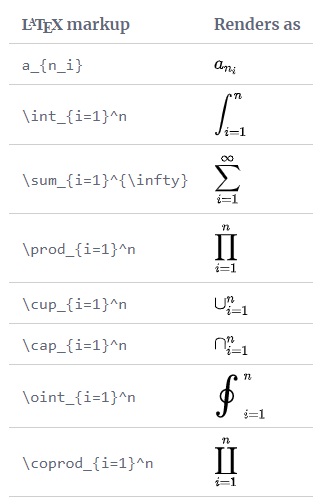